In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sbn

df = pd.read_csv('Wrangled_Marketing_data.csv',index_col = 0)

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',50)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age_in_years,Dt_Customer_Day,Dt_Customer_Month,Dt_Customer_Year,TotalMntSpent,Total_Number_Purchases,Age Segmentation
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain,52,16,6,2014,1190,15,Between 45 and 54
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Central America,61,15,6,2014,577,18,Between 55 and 64
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,United States of America,64,13,5,2014,251,11,Between 55 and 64
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia,55,11,5,2014,11,4,Between 55 and 64
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain,33,8,4,2014,91,8,Between 25 and 34


In [3]:
print(mean_confidence_interval(df['NumDealsPurchases']))

(2.259243886673878, 2.3949361041895303)


In [4]:
print(mean_confidence_interval(df['NumWebPurchases']))

(4.000728734465081, 4.196621653840081)


In [5]:
print(mean_confidence_interval(df['NumCatalogPurchases']))

(2.558644967680892, 2.7643335613277875)


In [7]:
print(mean_confidence_interval(df['NumStorePurchases']))

(5.675998617868298, 5.904631806983233)


In [2]:
def mean_confidence_interval(data, confidence=0.90):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sts.sem(a)
    h = se * sts.t.ppf((1 + confidence) / 2., n-1)
    return  (m-h, m+h)

In [4]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age_in_years', 'Dt_Customer_Day',
       'Dt_Customer_Month', 'Dt_Customer_Year', 'TotalMntSpent',
       'Total_Number_Purchases', 'Age Segmentation'],
      dtype='object')

In [12]:
Marketing_feautures = df[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Country', 'Age_in_years', 'Dt_Customer_Day',
       'Dt_Customer_Month', 'Dt_Customer_Year', 'TotalMntSpent',
       'Total_Number_Purchases', 'Age Segmentation']]

Firstcampain_target = df['AcceptedCmp1']
Secondcampain_target = df['AcceptedCmp2']
Thirdcampain_target = df['AcceptedCmp3']
Fourthcampain_target = df['AcceptedCmp4']
Firthcampain_target = df['AcceptedCmp5']
Lastcampain_target = df['Response']

dummied_df = pd.get_dummies(Marketing_feautures)

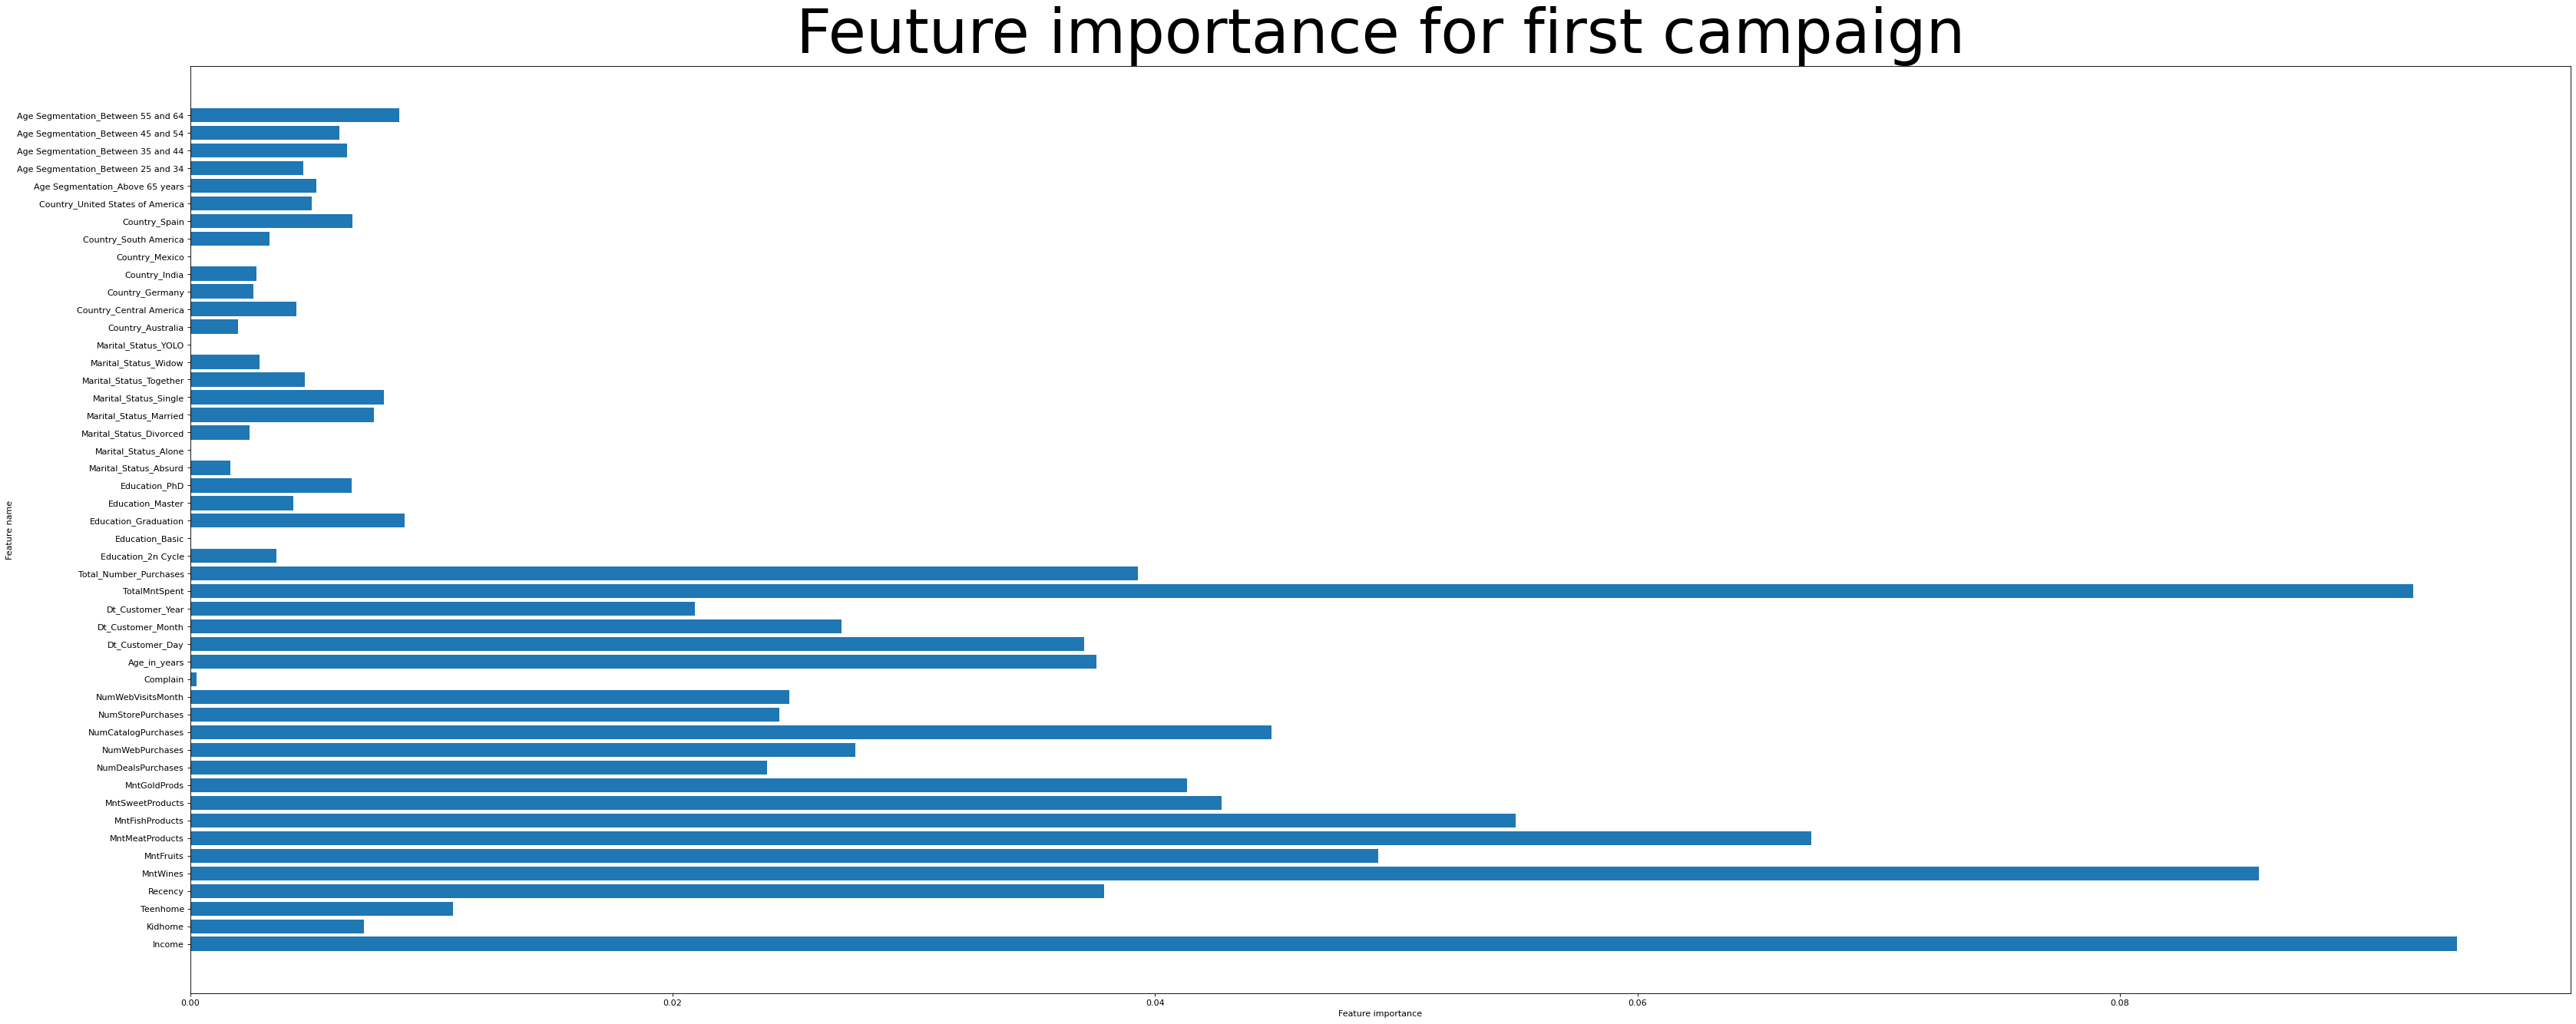

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from adspy_shared_utilities import plot_feature_importances

X_train1, X_test1, y_train1, y_test1 = train_test_split(dummied_df, Firstcampain_target,random_state=0)

clf1 = RandomForestClassifier().fit(X_train1, y_train1)

plt.figure(figsize=(50,20), dpi=80)
plot_feature_importances(clf1, dummied_df.columns)
plt.title('Feuture importance for first campaign',fontsize = 72)
plt.show()


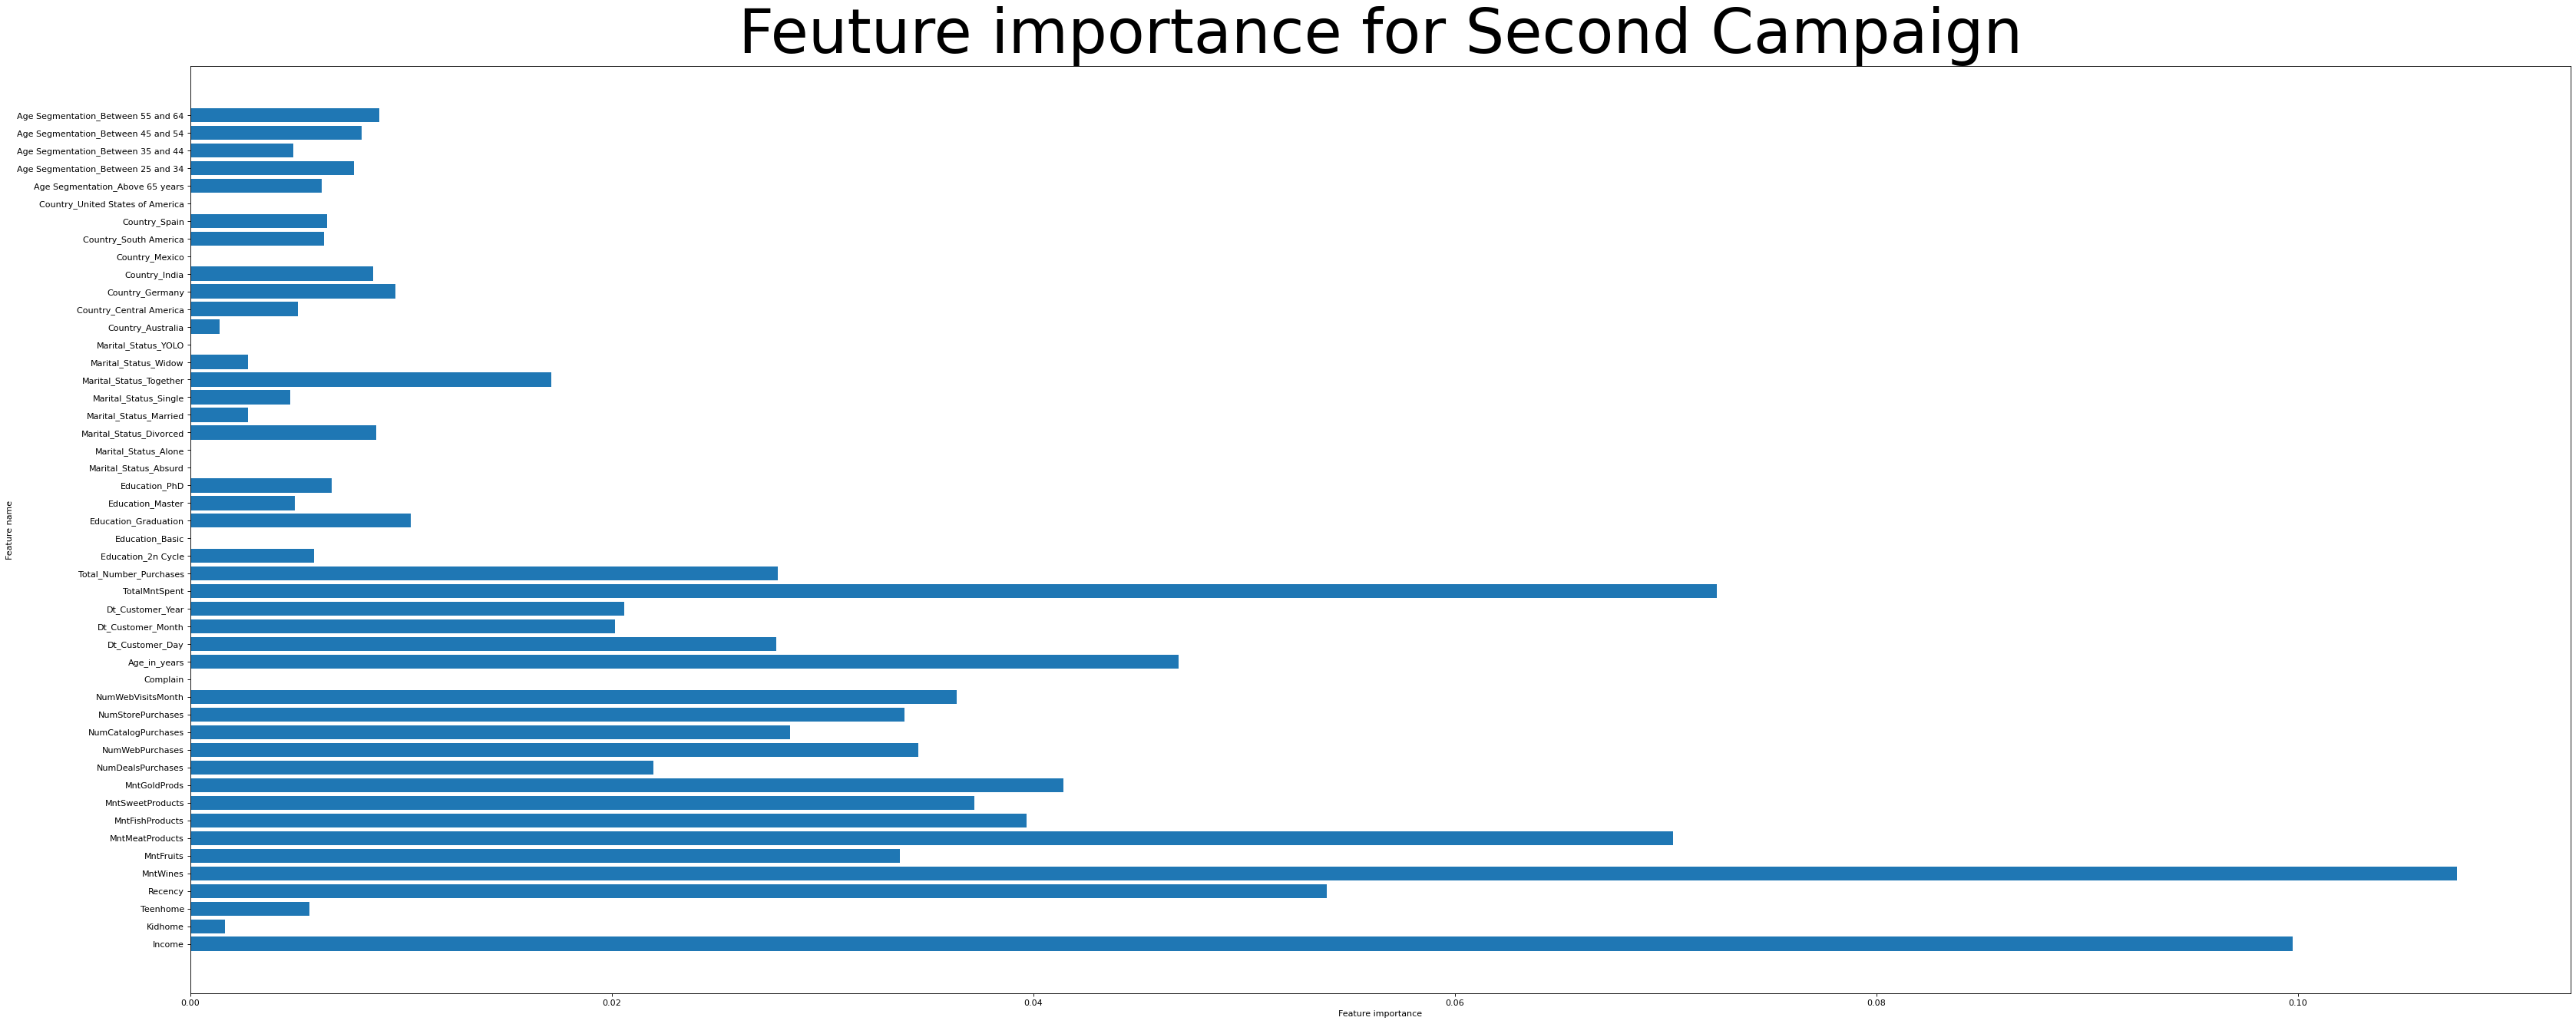

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dummied_df, Secondcampain_target,random_state=0)

clf2 = RandomForestClassifier().fit(X_train2, y_train2)

plt.figure(figsize=(50,20), dpi=80)
plot_feature_importances(clf2, dummied_df.columns)
plt.title('Feuture importance for Second Campaign',fontsize = 72)
plt.show()

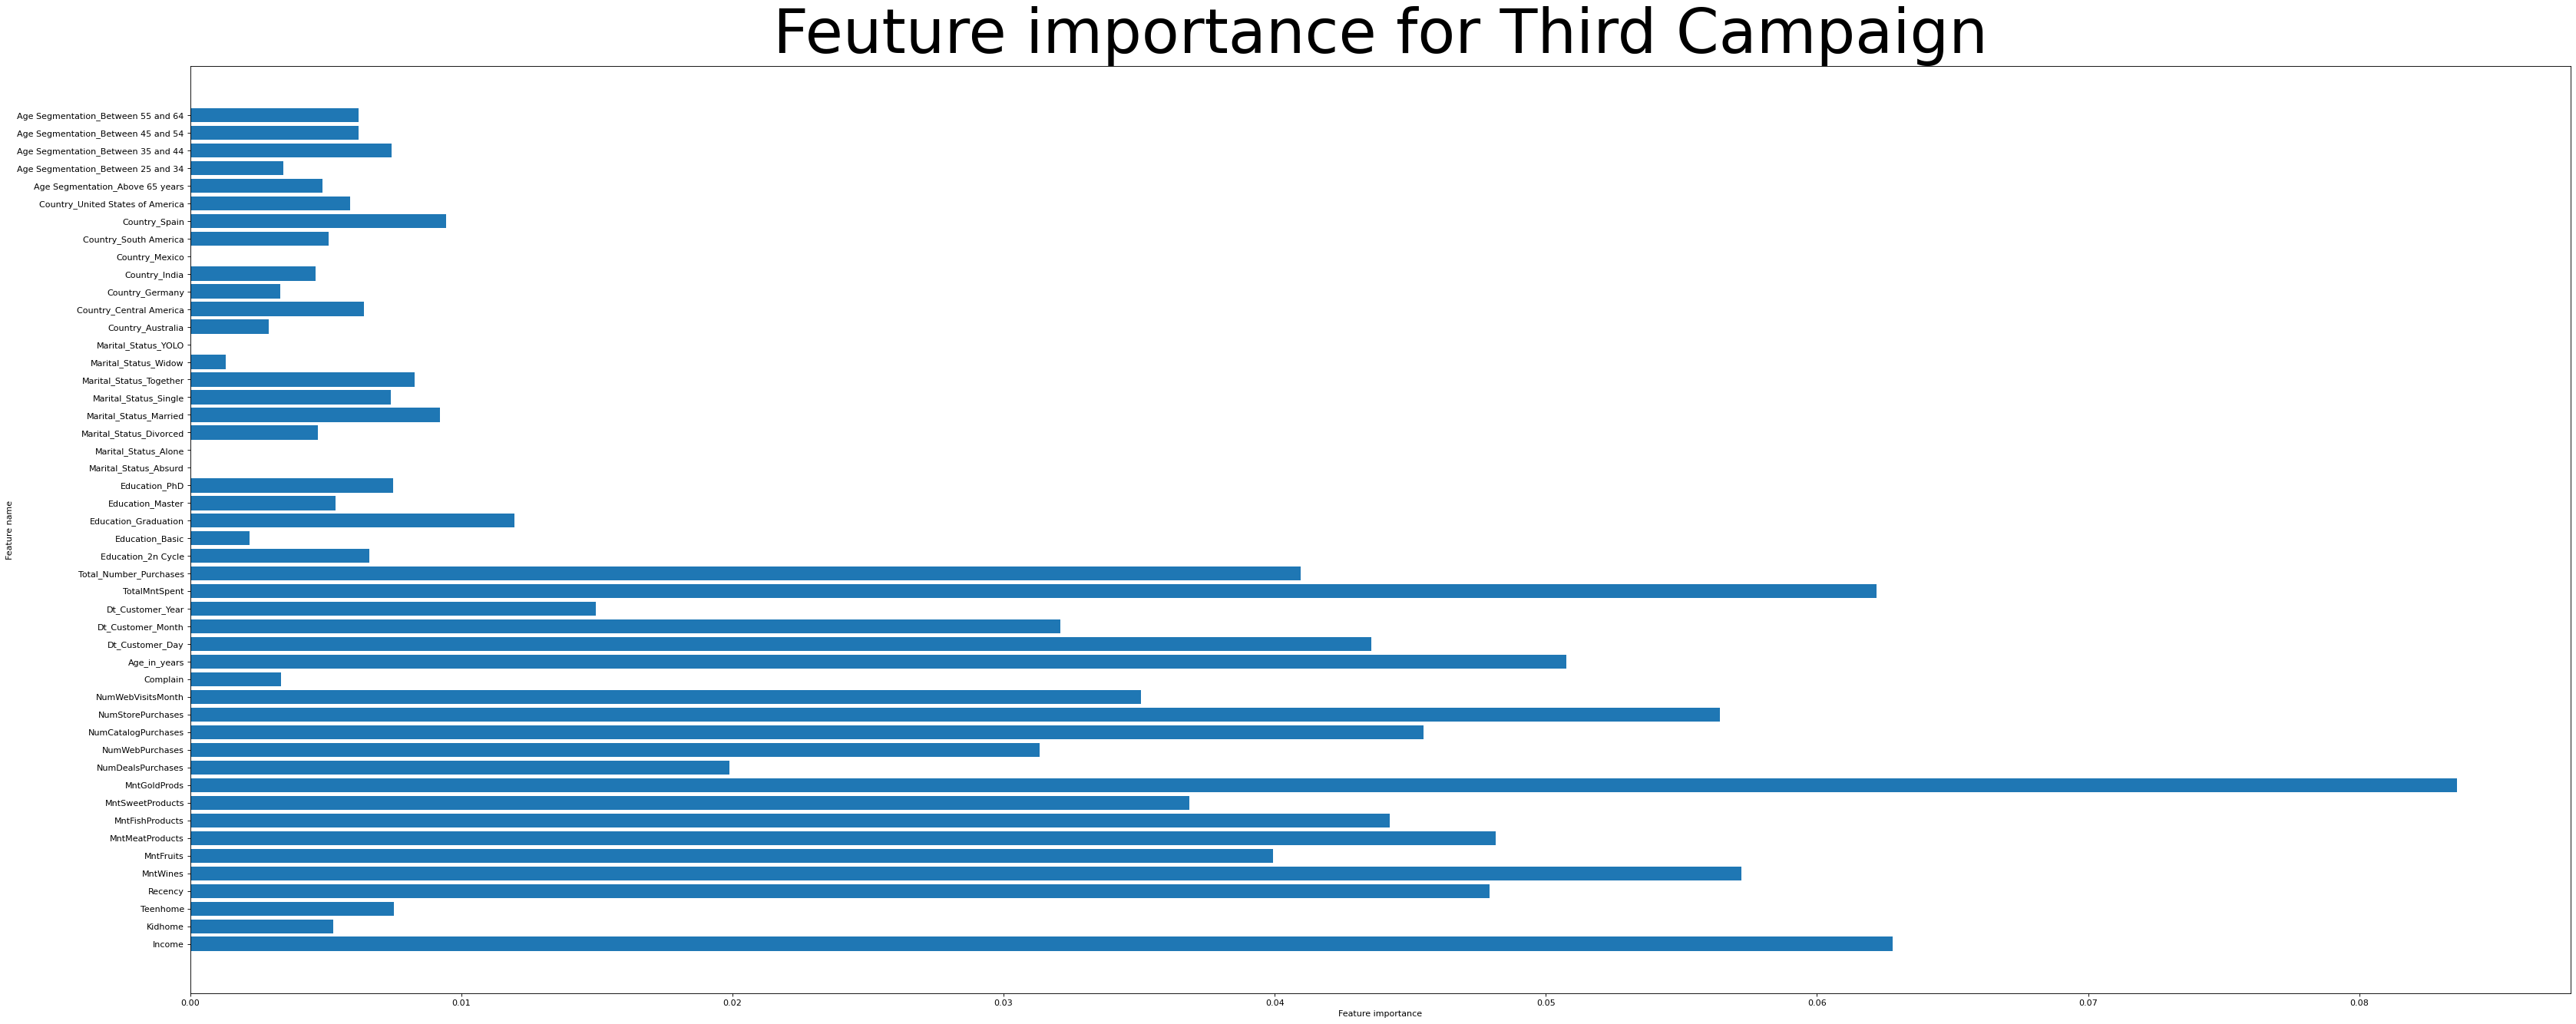

In [19]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(dummied_df, Thirdcampain_target,random_state=0)

clf3 = RandomForestClassifier().fit(X_train3, y_train3)

plt.figure(figsize=(50,20), dpi=80)
plot_feature_importances(clf3, dummied_df.columns)
plt.title('Feuture importance for Third Campaign',fontsize = 72)
plt.show()

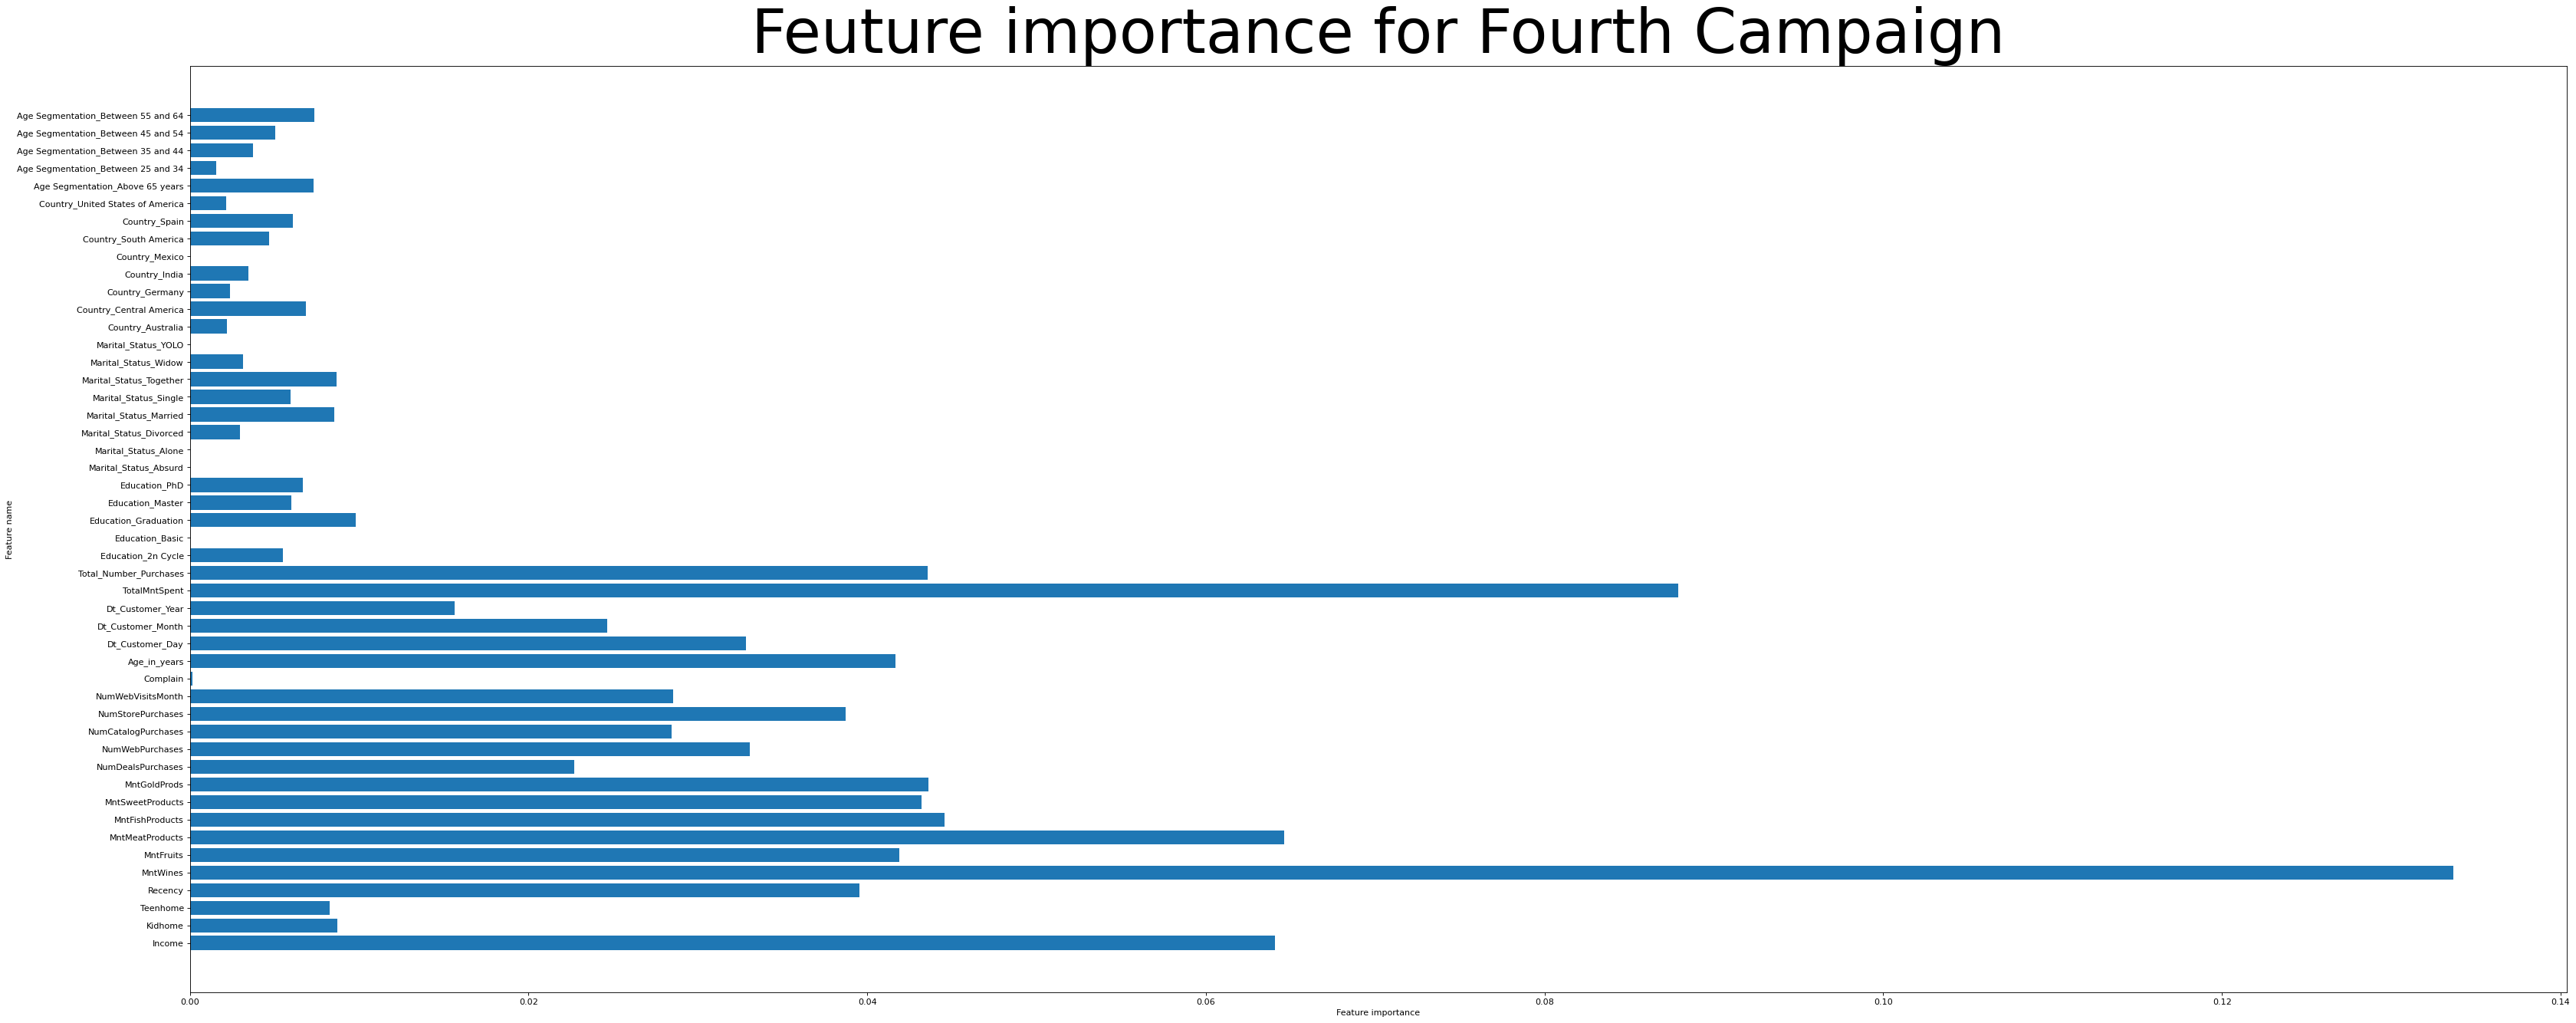

In [21]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(dummied_df, Fourthcampain_target,random_state=0)

clf4 = RandomForestClassifier().fit(X_train4, y_train4)

plt.figure(figsize=(50,20), dpi=80)
plot_feature_importances(clf4, dummied_df.columns)
plt.title('Feuture importance for Fourth Campaign',fontsize = 72)
plt.show()

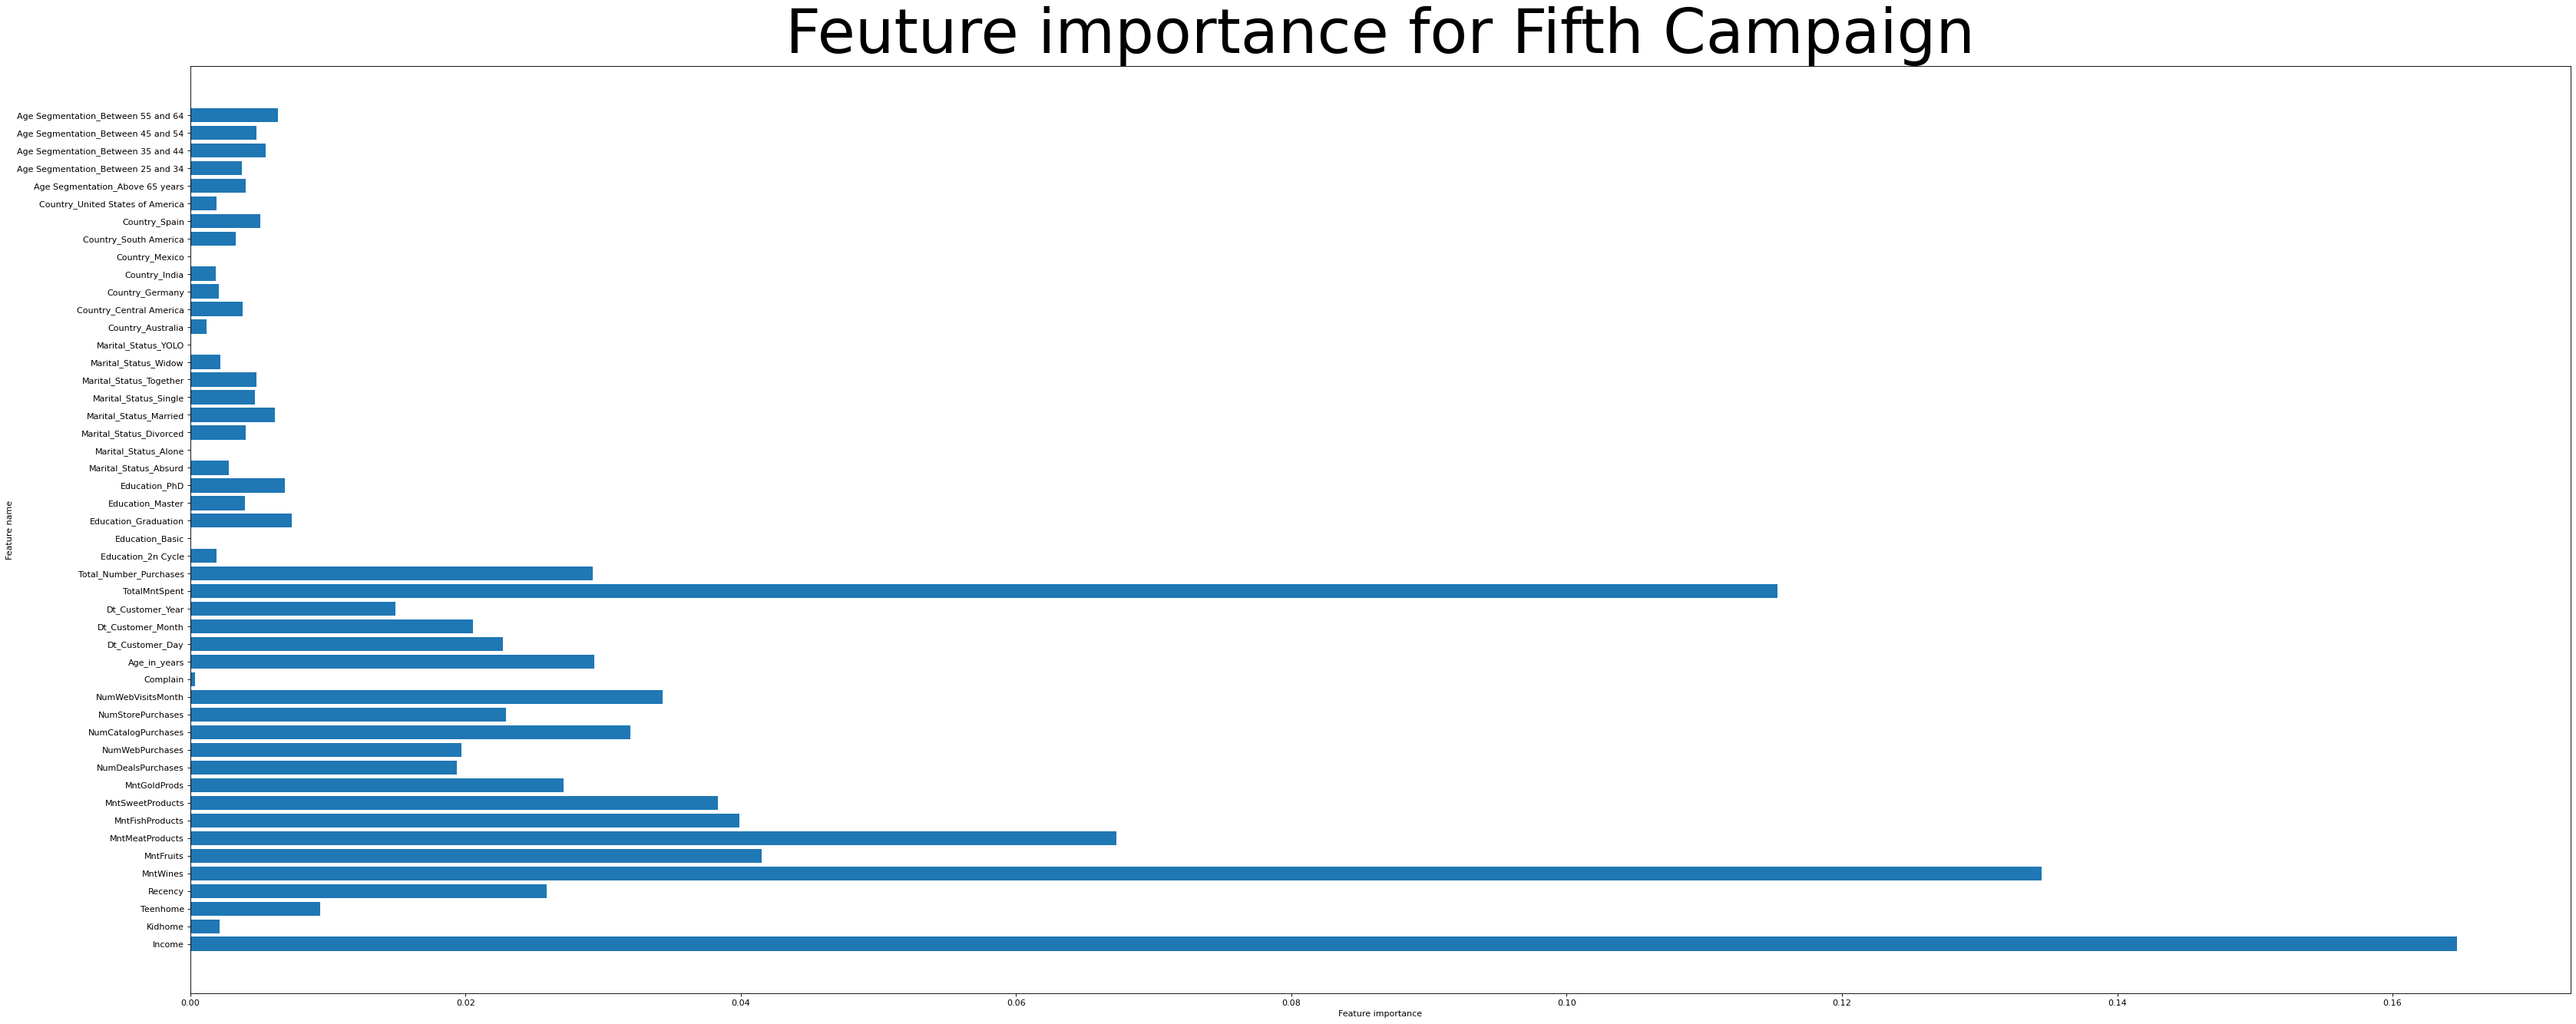

In [24]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(dummied_df, Firthcampain_target,random_state=0)

clf5 = RandomForestClassifier().fit(X_train5, y_train5)

plt.figure(figsize=(50,20), dpi=80)
plot_feature_importances(clf5, dummied_df.columns)
plt.title('Feuture importance for Fifth Campaign',fontsize = 72)
plt.show()

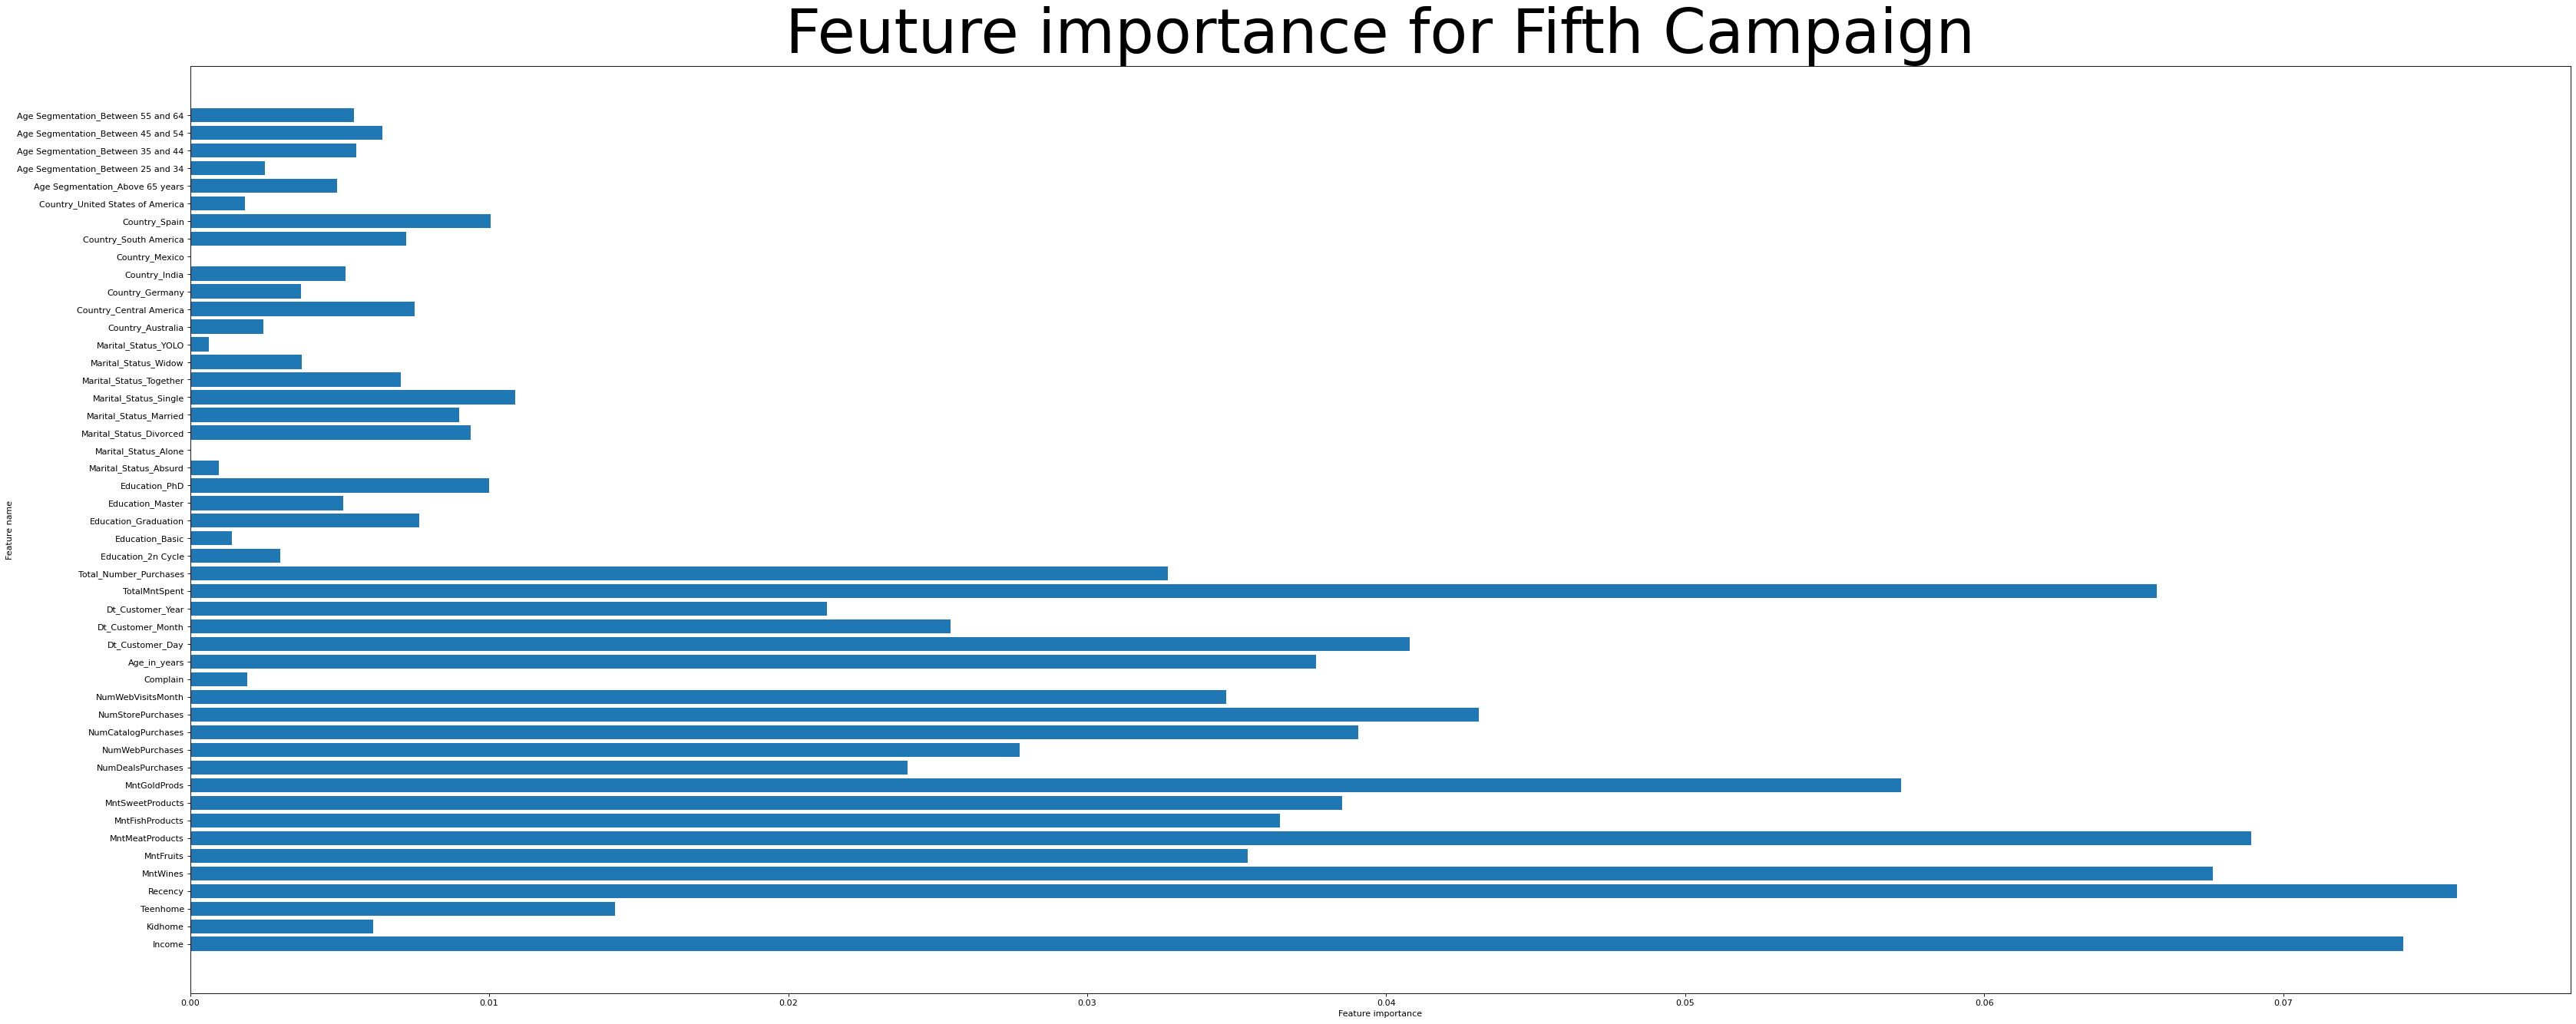

In [25]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(dummied_df, Lastcampain_target,random_state=0)

clf6 = RandomForestClassifier().fit(X_train6, y_train6)

plt.figure(figsize=(50,20), dpi=80)
plot_feature_importances(clf6, dummied_df.columns)
plt.title('Feuture importance for Fifth Campaign',fontsize = 72)
plt.show()

In [11]:
df.describe(include ='all')

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age_in_years,Dt_Customer_Day,Dt_Customer_Month,Dt_Customer_Year,TotalMntSpent,Total_Number_Purchases,Age Segmentation
count,2189,2189,2189.000000,2189,2189,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.00000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189
unique,5,8,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Graduation,Married,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,NaN,NaN,Between 45 and 54
freq,1100,845,NaN,1264,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,712
mean,NaN,NaN,51983.835541,NaN,NaN,49.132937,304.348561,26.184102,167.349018,37.448150,27.055733,44.141617,2.32709,4.098675,2.661489,5.790315,5.321608,0.072636,0.075377,0.073093,0.064870,0.013248,0.149840,0.009137,NaN,53.126085,15.647328,6.453632,2013.029237,606.527181,14.877570,NaN
std,NaN,NaN,21403.940687,NaN,NaN,28.996031,336.578911,39.567594,226.603996,54.648525,41.265500,52.267349,1.92902,2.784841,2.924098,3.250282,2.424508,0.259597,0.264059,0.260348,0.246352,0.114361,0.356996,0.095170,NaN,11.709564,8.794104,3.491996,0.685488,602.251278,7.671357,NaN
min,NaN,NaN,1730.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,26.000000,1.000000,1.000000,2012.000000,5.000000,0.000000,NaN
25%,NaN,NaN,35641.000000,NaN,NaN,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,45.000000,8.000000,3.000000,2013.000000,69.000000,8.000000,NaN
50%,NaN,NaN,51411.000000,NaN,NaN,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,52.000000,16.000000,6.000000,2013.000000,397.000000,15.000000,NaN
75%,NaN,NaN,68148.000000,NaN,NaN,74.000000,505.000000,33.000000,230.000000,50.000000,33.000000,56.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,63.000000,23.000000,10.000000,2013.000000,1045.000000,21.000000,NaN


In [7]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age_in_years', 'Dt_Customer_Day',
       'Dt_Customer_Month', 'Dt_Customer_Year', 'TotalMntSpent',
       'Total_Number_Purchases', 'Age Segmentation'],
      dtype='object')

In [22]:
df['Country'].unique()

array(['Spain', 'Central America', 'United States of America',
       'Australia', 'Germany', 'India', 'South America', 'Mexico'],
      dtype=object)

In [23]:
mexico_indices = df[df['Country'] == 'Mexico'].index.tolist()

In [27]:
df.drop(mexico_indices,inplace=True)
df.shape

(2186, 32)

In [28]:
df['Kidhome'] = df['Kidhome'].astype(str)
df['Teenhome'] = df['Teenhome'].astype(str)
df['AcceptedCmp1'] = df['AcceptedCmp1'].astype(str)
df['AcceptedCmp2'] = df['AcceptedCmp2'].astype(str)
df['AcceptedCmp3'] = df['AcceptedCmp3'].astype(str)
df['AcceptedCmp4'] = df['AcceptedCmp4'].astype(str)
df['AcceptedCmp5'] = df['AcceptedCmp5'].astype(str)
df['Response'] = df['Response'].astype(str)                                              

In [3]:
country_splits = df['Country'].value_counts()

In [29]:
accepted_offer_1stcampain = df[df['AcceptedCmp1'] == '1']
accepted_offer_2ndcampain = df[df['AcceptedCmp2'] == '1']
accepted_offer_3rdcampain = df[df['AcceptedCmp3'] == '1']
accepted_offer_4thcampain = df[df['AcceptedCmp4'] == '1']
accepted_offer_5thtcampain = df[df['AcceptedCmp5'] == '1']
accepted_offer_lastCampain = df[df['Response'] == '1']

In [31]:
contengency_1scampaign = pd.crosstab(df['Country'],df['AcceptedCmp1'])
contengency_1scampaign

AcceptedCmp1,0,1
Country,,
Australia,152,7
Central America,247,18
Germany,113,7
India,139,7
South America,313,20
Spain,978,76
United States of America,102,7


In [32]:
contengency_2ndcampaign = pd.crosstab(df['Country'],df['AcceptedCmp2'])
contengency_2ndcampaign

AcceptedCmp2,0,1
Country,,
Australia,159,0
Central America,259,6
Germany,118,2
India,144,2
South America,329,4
Spain,1039,15
United States of America,109,0


In [33]:
contengency_3rdcampaign = pd.crosstab(df['Country'],df['AcceptedCmp3'])
contengency_3rdcampaign

AcceptedCmp3,0,1
Country,,
Australia,150,9
Central America,248,17
Germany,110,10
India,133,13
South America,312,21
Spain,974,80
United States of America,101,8


In [34]:
contengency_4thcampaign = pd.crosstab(df['Country'],df['AcceptedCmp4'])
contengency_4thcampaign

AcceptedCmp4,0,1
Country,,
Australia,153,6
Central America,241,24
Germany,109,11
India,135,11
South America,313,20
Spain,967,87
United States of America,103,6


In [35]:
contengency_5thcampaign = pd.crosstab(df['Country'],df['AcceptedCmp5'])
contengency_5thcampaign

AcceptedCmp5,0,1
Country,,
Australia,146,13
Central America,244,21
Germany,112,8
India,140,6
South America,312,21
Spain,968,86
United States of America,104,5


In [36]:
contengency_lastcampaign = pd.crosstab(df['Country'],df['Response'])
contengency_lastcampaign

Response,0,1
Country,,
Australia,136,23
Central America,227,38
Germany,103,17
India,133,13
South America,281,52
Spain,884,170
United States of America,96,13


In [37]:
sts.chi2_contingency(contengency_lastcampaign)

(6.424817949346204,
 0.3773199864163151,
 6,
 array([[135.28819762,  23.71180238],
        [225.48032937,  39.51967063],
        [102.10430009,  17.89569991],
        [124.22689844,  21.77310156],
        [283.33943275,  49.66056725],
        [896.81610247, 157.18389753],
        [ 92.74473925,  16.25526075]]))

In [39]:
sts.chi2_contingency(contengency_5thcampaign)

(5.407543269086226,
 0.4927010282043117,
 6,
 array([[147.36230558,  11.63769442],
        [245.60384263,  19.39615737],
        [111.2168344 ,   8.7831656 ],
        [135.31381519,  10.68618481],
        [308.62671546,  24.37328454],
        [976.85452882,  77.14547118],
        [101.02195791,   7.97804209]]))

In [40]:
sts.chi2_contingency(contengency_4thcampaign)

(7.10110790430695,
 0.3115979922045291,
 6,
 array([[146.99862763,  12.00137237],
        [244.99771272,  20.00228728],
        [110.94236048,   9.05763952],
        [134.97987191,  11.02012809],
        [307.86505032,  25.13494968],
        [974.44373285,  79.55626715],
        [100.7726441 ,   8.2273559 ]]))

In [41]:
sts.chi2_contingency(contengency_3rdcampaign)

(2.30424751239617,
 0.8897001055250693,
 6,
 array([[147.50777676,  11.49222324],
        [245.8462946 ,  19.1537054 ],
        [111.32662397,   8.67337603],
        [135.4473925 ,  10.5526075 ],
        [308.93138152,  24.06861848],
        [977.81884721,  76.18115279],
        [101.12168344,   7.87831656]]))

In [42]:
sts.chi2_contingency(contengency_2ndcampaign)

(5.60564172771393,
 0.46878152991663546,
 6,
 array([[ 156.89066789,    2.10933211],
        [ 261.48444648,    3.51555352],
        [ 118.40805124,    1.59194876],
        [ 144.063129  ,    1.936871  ],
        [ 328.58234218,    4.41765782],
        [1040.01738335,   13.98261665],
        [ 107.55397987,    1.44602013]]))

In [43]:
sts.chi2_contingency(contengency_1scampaign)

(2.987068065577102,
 0.8104681689242546,
 6,
 array([[148.6715462 ,  10.3284538 ],
        [247.78591034,  17.21408966],
        [112.20494053,   7.79505947],
        [136.51601098,   9.48398902],
        [311.36870997,  21.63129003],
        [985.53339433,  68.46660567],
        [101.91948765,   7.08051235]]))

In [38]:
sts.chi2.ppf(0.95, 6)

12.591587243743977

In [10]:
accepted_offer_1stcampain.describe(include ='all')

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age_in_years,Dt_Customer_Day,Dt_Customer_Month,Dt_Customer_Year,TotalMntSpent,Total_Number_Purchases,Age Segmentation
count,142,142,142.000000,142,142,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,142.000000,142.000000,142.0,142,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142
unique,4,6,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Graduation,Married,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,NaN,NaN,Between 45 and 54
freq,81,62,NaN,131,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76,NaN,NaN,NaN,NaN,NaN,NaN,35
mean,NaN,NaN,78494.866197,NaN,NaN,46.711268,760.225352,55.345070,434.443662,91.112676,64.676056,77.274648,1.429577,5.739437,6.077465,8.091549,3.556338,0.161972,0.330986,0.471831,1.0,0.091549,0.549296,0.0,NaN,53.415493,15.887324,6.281690,2013.126761,1483.077465,21.338028,NaN
std,NaN,NaN,11774.169932,NaN,NaN,28.454164,334.284955,54.948983,264.988519,73.373918,54.695877,65.397979,1.375561,2.188557,2.529469,2.707764,2.047398,0.369729,0.472234,0.500973,0.0,0.289410,0.499325,0.0,NaN,13.567401,9.079709,3.527734,0.672237,508.214816,4.379008,NaN
min,NaN,NaN,37929.000000,NaN,NaN,1.000000,152.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,NaN,28.000000,1.000000,1.000000,2012.000000,265.000000,12.000000,NaN
25%,NaN,NaN,72920.750000,NaN,NaN,25.000000,504.750000,19.250000,180.000000,32.000000,22.250000,30.750000,1.000000,4.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,NaN,43.000000,7.250000,3.000000,2013.000000,1132.000000,18.000000,NaN
50%,NaN,NaN,79767.000000,NaN,NaN,44.500000,761.500000,29.500000,444.500000,75.500000,46.500000,49.500000,1.000000,5.000000,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.0,NaN,52.500000,17.000000,6.000000,2013.000000,1513.500000,21.000000,NaN
75%,NaN,NaN,85663.750000,NaN,NaN,71.000000,1008.250000,84.500000,616.250000,145.750000,96.750000,113.500000,1.000000,7.000000,8.000000,10.000000,5.000000,0.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.0,NaN,65.000000,23.750000,9.000000,2014.000000,1847.000000,24.000000,NaN
